In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Data Loading, Initial Observation and Preprocessing

In [23]:
# load the data
df_raw = pd.read_csv("data/monatszahlen2402_verkehrsunfaelle_export_29_02_24_r.csv")

In [24]:
# some observation
df_raw.head

<bound method NDFrame.head of            MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT  \
0      Alkoholunfälle               insgesamt  2024  202401    NaN   
1      Alkoholunfälle               insgesamt  2024  202402    NaN   
2      Alkoholunfälle               insgesamt  2024  202403    NaN   
3      Alkoholunfälle               insgesamt  2024  202404    NaN   
4      Alkoholunfälle               insgesamt  2024  202405    NaN   
...               ...                     ...   ...     ...    ...   
2249  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0   
2250  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0   
2251  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0   
2252  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0   
2253  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0   

      VORJAHRESWERT  VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0               NaN                       NaN   

In [25]:
# see the unique values of the columns
print(df_raw["JAHR"].unique())
print(df_raw["MONAT"].unique())
print(df_raw["MONATSZAHL"].unique())
print(df_raw["AUSPRAEGUNG"].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011
 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000]
['202401' '202402' '202403' '202404' '202405' '202406' '202407' '202408'
 '202409' '202410' '202411' '202412' '202301' '202302' '202303' '202304'
 '202305' '202306' '202307' '202308' '202309' '202310' '202311' '202312'
 'Summe' '202201' '202202' '202203' '202204' '202205' '202206' '202207'
 '202208' '202209' '202210' '202211' '202212' '202101' '202102' '202103'
 '202104' '202105' '202106' '202107' '202108' '202109' '202110' '202111'
 '202112' '202001' '202002' '202003' '202004' '202005' '202006' '202007'
 '202008' '202009' '202010' '202011' '202012' '201901' '201902' '201903'
 '201904' '201905' '201906' '201907' '201908' '201909' '201910' '201911'
 '201912' '201801' '201802' '201803' '201804' '201805' '201806' '201807'
 '201808' '201809' '201810' '201811' '201812' '201701' '201702' '201703'
 '201704' '201705' '201706' '201707' '201708' '201709' '201710' '20171

In [26]:
# some preprocessing

# drop the data after 2020, as we'll predict them - do not overrite as we might want to compare our predictions later
df = df_raw.loc[df_raw['JAHR'] <= 2020]

# drop the rows with month==summe
df = df[df["MONAT"] != "Summe"]

# reset the index after dropping
df = df.reset_index(drop=True)

In [27]:
# let's convert the month column to more readible format (MM)
df['MONAT'] = df['MONAT'].str[4:6]
df['MONAT'] = df['MONAT'].astype(int)

# then let's srot the rows according to their dates, acsending 
df = df.sort_values(by=['JAHR', "MONAT"]).reset_index(drop=True)

In [28]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2000,1,78.0,NaN,NaN,NaN,78.0
1,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,NaN,NaN,NaN,37.0
2,Fluchtunfälle,insgesamt,2000,1,835.0,NaN,NaN,NaN,835.0
3,Fluchtunfälle,Verletzte und Getötete,2000,1,34.0,NaN,NaN,NaN,34.0
4,Verkehrsunfälle,insgesamt,2000,1,3448.0,NaN,NaN,NaN,3448.0
...,...,...,...,...,...,...,...,...,...
1759,Fluchtunfälle,insgesamt,2020,12,694.0,925.0,-19.68,-24.97,835.0
1760,Fluchtunfälle,Verletzte und Getötete,2020,12,33.0,43.0,22.22,-23.26,39.0
1761,Verkehrsunfälle,insgesamt,2020,12,2661.0,3462.0,-15.52,-23.14,3203.0
1762,Verkehrsunfälle,mit Personenschäden,2020,12,270.0,326.0,-9.09,-17.18,410.0


## Data Visualization

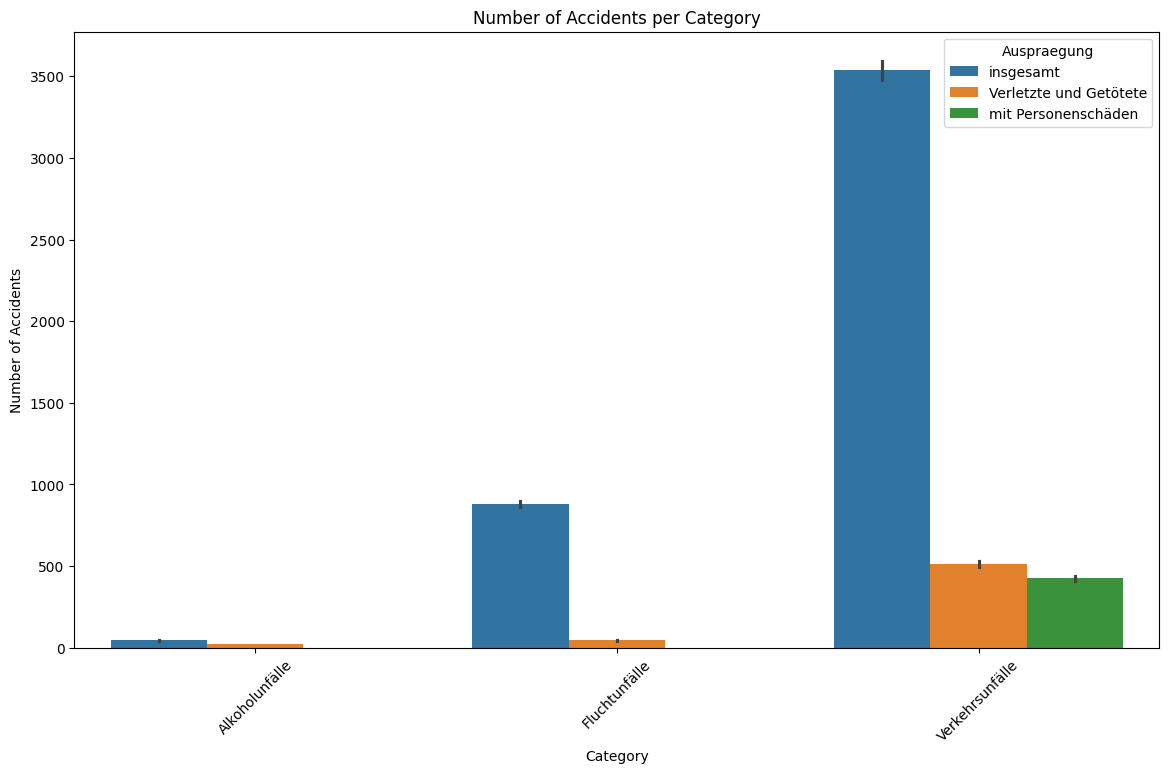

In [29]:
# let's first see the accident number by category and sub category
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='MONATSZAHL', y='WERT', hue='AUSPRAEGUNG')
plt.title('Number of Accidents per Category')
plt.xlabel('Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Auspraegung')
plt.show()

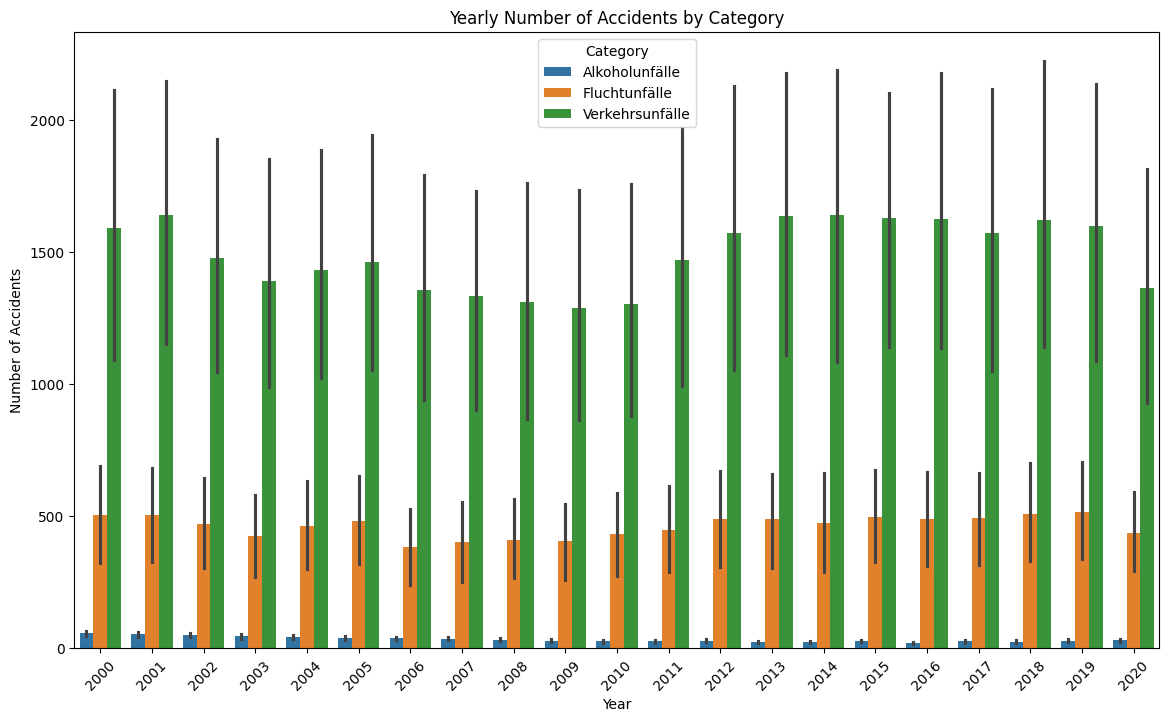

In [30]:
# now let's visualize them historically by year, by only category (MONATSZAHL) this time
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='JAHR', y='WERT', hue='MONATSZAHL')
plt.title('Yearly Number of Accidents by Category')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

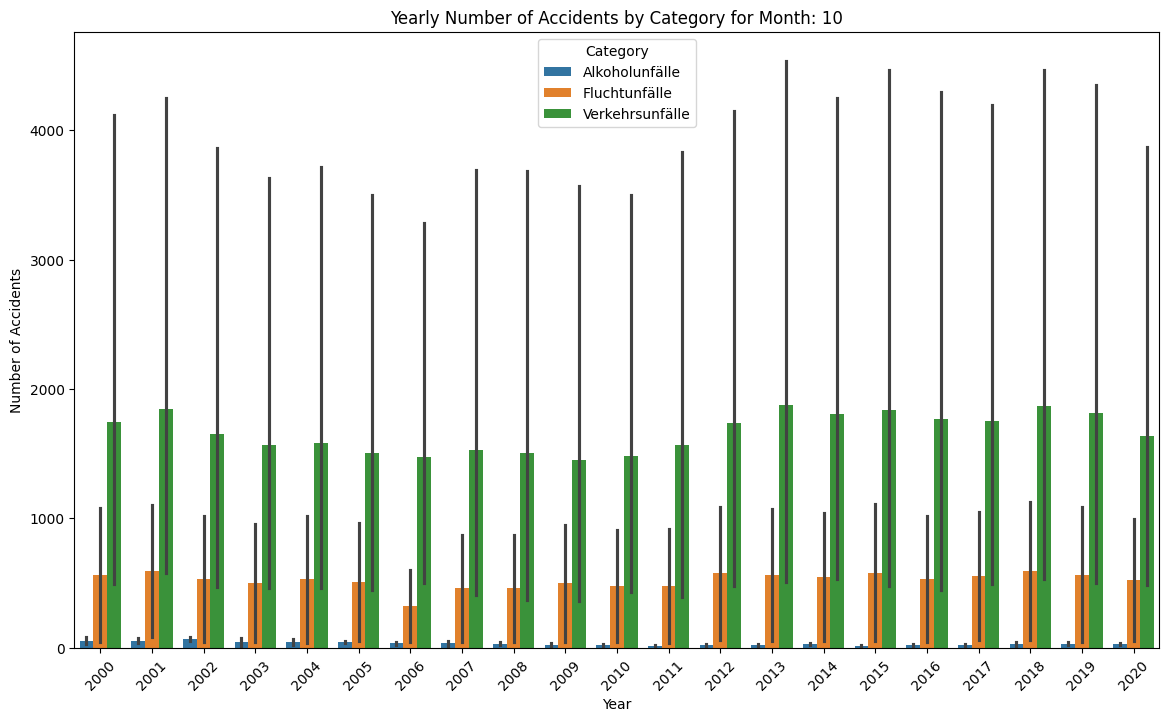

In [33]:
# let's dive deeper to discover some patterns, below code will visualize yearly graphs, filtered by months

month = 10

plt.figure(figsize=(14, 8))
sns.barplot(data=df[df["MONAT"] == month], x='JAHR', y='WERT', hue='MONATSZAHL')
plt.title(f'Yearly Number of Accidents by Category for Month: {month}')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

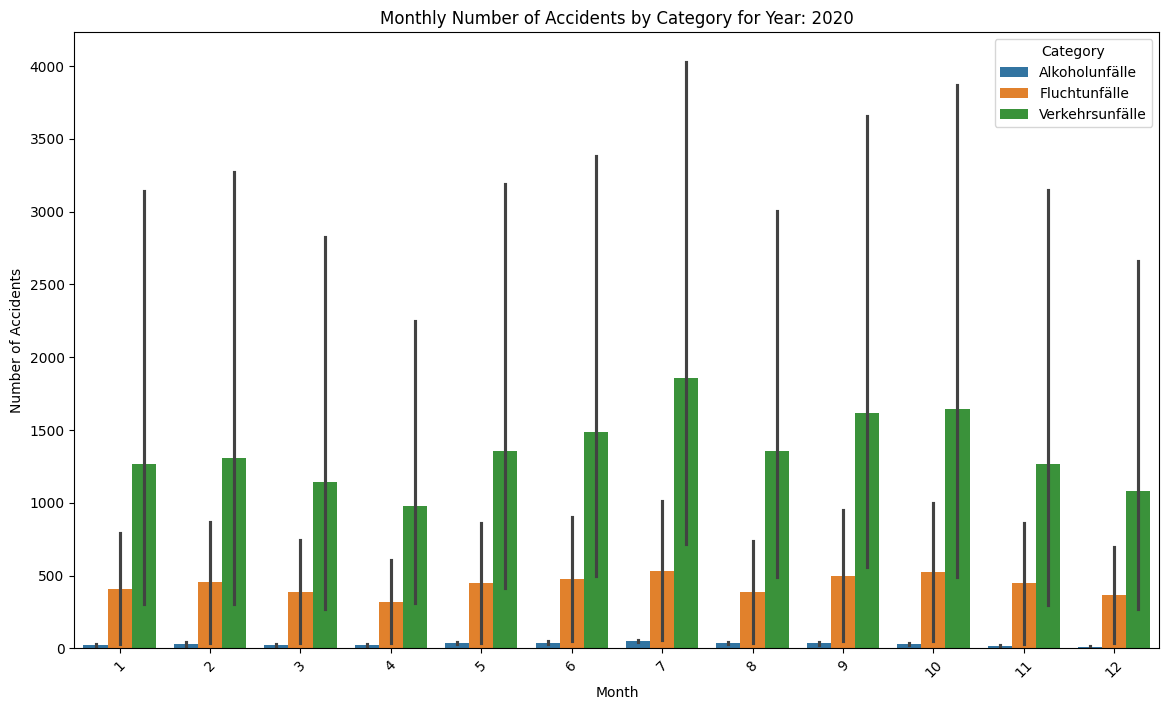

In [35]:
# now let's compare distribution of two years

year = 2020

plt.figure(figsize=(14, 8))
sns.barplot(data=df[df["JAHR"] == year], x='MONAT', y='WERT', hue='MONATSZAHL')
plt.title(f'Monthly Number of Accidents by Category for Year: {year}')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

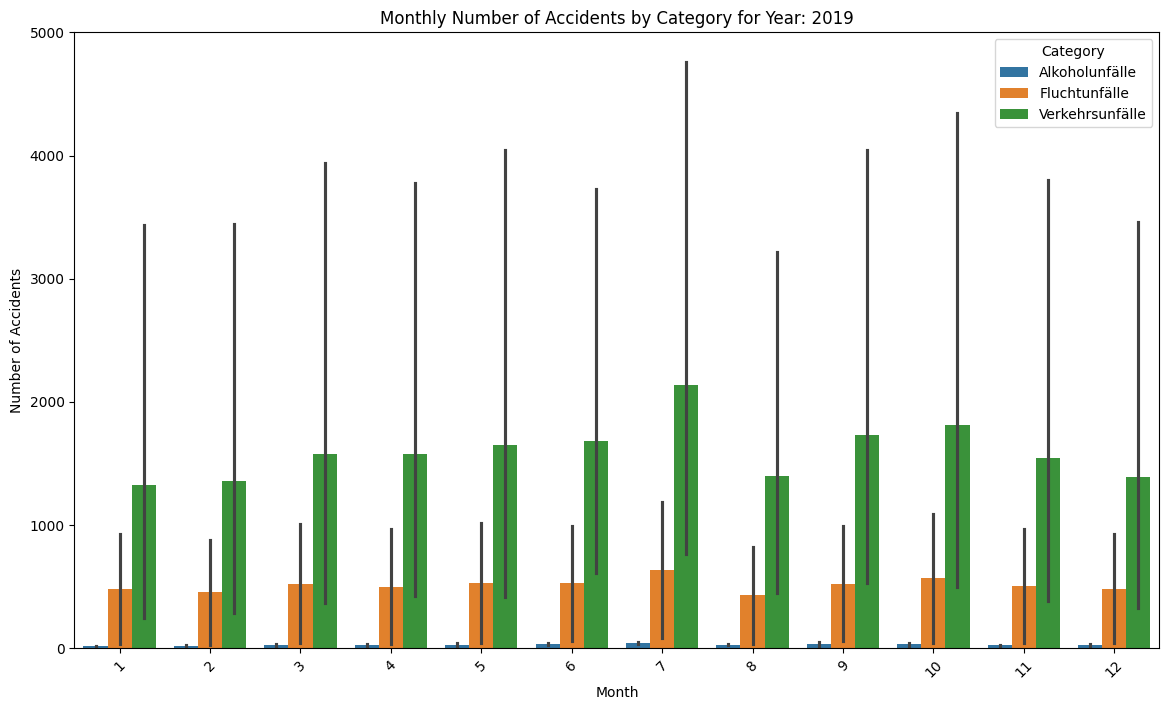

In [36]:
year = 2019

plt.figure(figsize=(14, 8))
sns.barplot(data=df[df["JAHR"] == year], x='MONAT', y='WERT', hue='MONATSZAHL')
plt.title(f'Monthly Number of Accidents by Category for Year: {year}')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

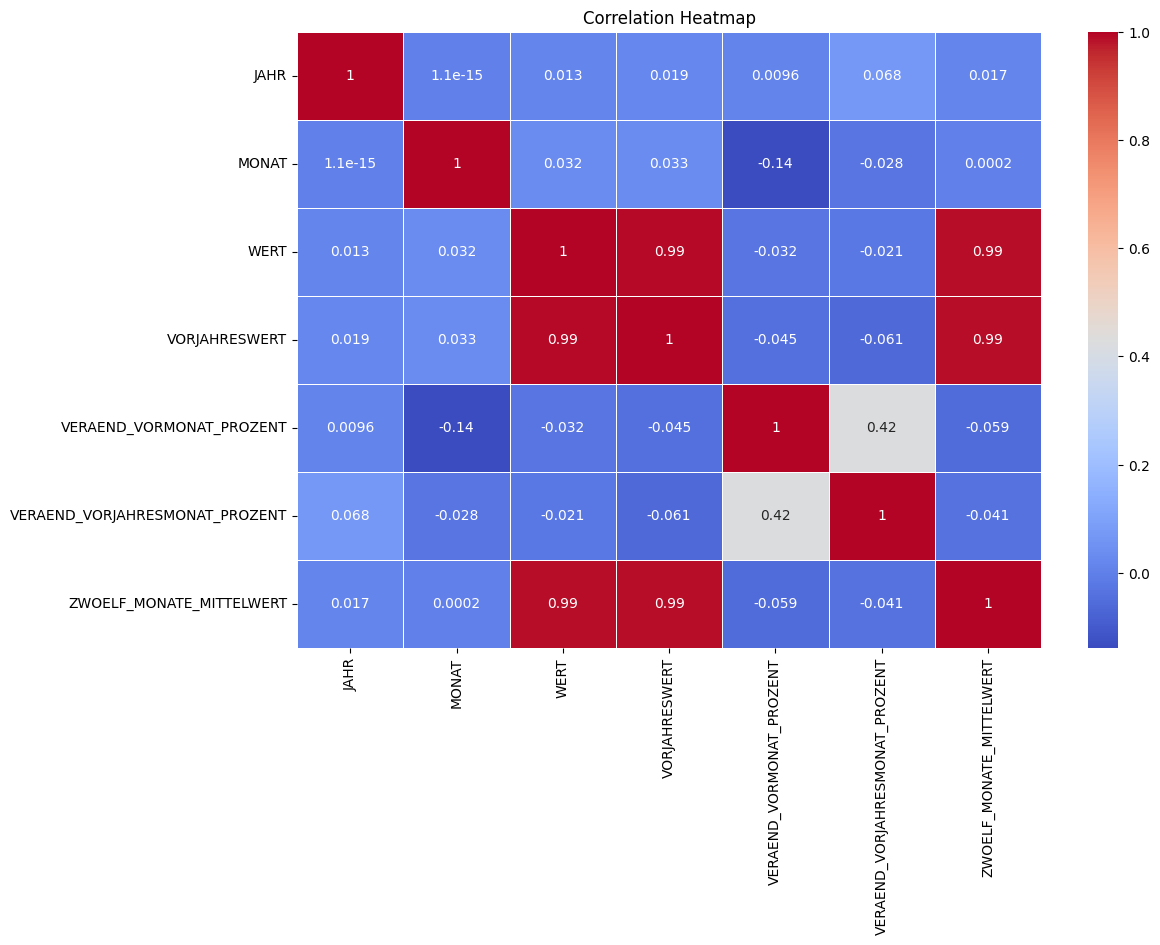

In [38]:
# let's finally see the correlation map

plt.figure(figsize=(12, 8))
corr = df[['JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<div class="alert alert-success">
<h3>Some observation after the visualization</h3>
<p>
We can see there is a correlation between the month and the number of accidents. For example there is relatively more accidents on the 7th month comparing to 8th. Therefore we should use this information when building our model, by adding some lag and rolling features, on top of the ones provided like VORJAHRESWERT.
</p>
</div>
